<a href="https://colab.research.google.com/github/fabianobriao/Data_Scrubbing/blob/main/datascrubbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
# Importação de um arquivo onde
# há as colunas devem ter os nomes modificados
# analisaremos se existem dados Nulos , NAs, ou campos vazios
# caso existam iremos fazer as correções
# analisaremos de existem outliers
# iremos buscar dados homográfos, homônimos perfeitos e sinônimos para análise e correçẽos se necessárias.


## import csv
# arquivo separada por ponto e vírgula
file = "/content/drive/MyDrive/Colab_Notebooks/Data_Scrubbing/Churn.csv"
df3 = pd.read_csv(file, sep = ";")
print(df3.head(3))
df3.shape #tamanho das df
#------------------
#nomear colunas"
df3.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito","Ativo", "Salario", "Saiu"]
df3.head(3)

   X0   X1  X2        X3  X4  X4.1       X6  X7  X8  X9         X10  X11
0   1  619  RS  Feminino  42     2        0   1   1   1  10134888.0    1
1   2  608  SC  Feminino  41     1  8380786   1   0   1  11254258.0    0
2   3  502  RS  Feminino  42     8  1596608   3   1   0  11393157.0    1


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1


In [7]:
# Primeira analise, dados duplicados de ID
df3[df3.duplicated(['Id'], keep=False)] #identificando

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [21]:
# Substituindo os duplicando, (first) quero dizer, ficarei com o primeiro
df3.drop_duplicates(subset="Id", keep='first',inplace =True)
df3[df3.duplicated(['Id'], keep=False)] #identificando

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [94]:
# Ajeitando dados Nulos , NAs, ou campos vazios
print(df3.isnull().sum()) # mostra colunas que contem Null ou NAN, ou vazios
#Podemos observar que há algum desses tipos de dados em Genero e Salario

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64


Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

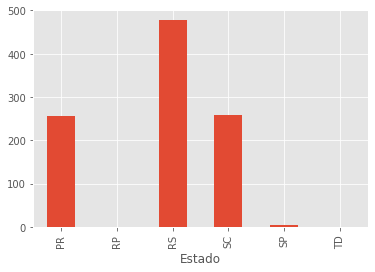

In [54]:
# Analise de dados nominais, Estado e Genero
grupo1 = df3.groupby(["Estado"]).size()
grupo1.plot.bar()
grupo1 # analisando percebe-se estados diferente de RS, PR e SC

In [26]:
# Substituindo os estados errados pelo estado modal
df3.loc[df3["Estado"].isin(["RP","SP","TD"]), "Estado"]="RS"
df3.groupby(["Estado"]).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

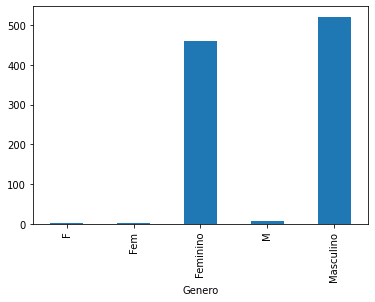

In [17]:
grupo2 = df3.groupby(["Genero"]).size()
grupo2.plot.bar()
grupo2 # analisando percebe-se estados diferentes formas escritas de Feminimo e Masculinho

In [18]:
# Ajeitando a coluna Genero
# agrupando palavras de mesmo sentindo mas digitas de forma distinta, padronizando.
# prenchendo NAs
df3['Genero'].fillna("Masculino", inplace=True)# alteracao dos NAs por masculino por tem muito mais masculino
#que feminino
#padronizando M por Masculino
df3.loc[df3["Genero"] == "M", "Genero"] = "Masculino"
#padronizando F e Fem por Feminino
df3.loc[df3["Genero"].isin(["F", "Fem"]), "Genero"] = "Feminino"
grupo = df3.groupby(["Genero"]).size() # size() tamanho
print(grupo)


Genero
Feminino     464
Masculino    535
dtype: int64


In [58]:
#observando as variaveis ao mesmo tempo

In [76]:
# Análise de variáveis quantitativas, Escore
df3["Score"].describe() # ness momento nada estranho

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Escore')

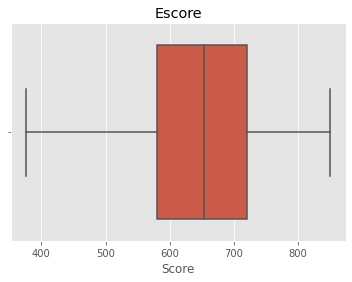

In [77]:
sns.boxplot(df3["Score"]).set_title('Escore')
# sem outiliers, pouca assimetria

Text(0.5, 1.0, 'Score')

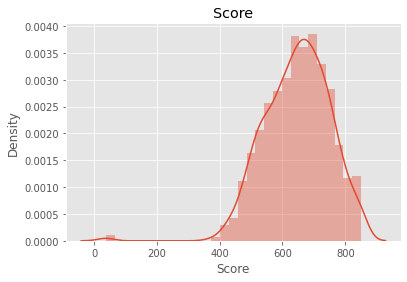

In [121]:
sns.distplot(df3["Score"]).set_title("Score")

In [79]:
# Idade
df3["Idade"].describe() # ness momento nada estranho
# observa-se uma idade negativa e uma idade de 140 anos

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

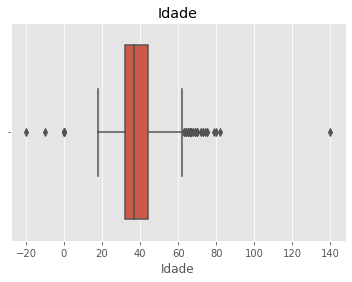

In [81]:
sns.boxplot(df3["Idade"]).set_title("Idade")
# Com o boxplot podemos ver os dados discrepantes

Text(0.5, 1.0, 'Idade')

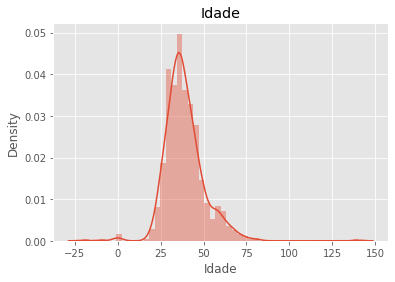

In [82]:
sns.distplot(df3["Idade"]).set_title("Idade")
#Podemos confirmar no histograma e ver a média por volta de 27 anos

In [123]:
# Ajeitando a coluna idades
#df3['Idade'].describe()
# Assumiremos idades maiores que zero e menores que 120
# Observaremos quais idades estão fora desse domínio
df3.loc[(df3['Idade'] < 0 ) | (df3['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

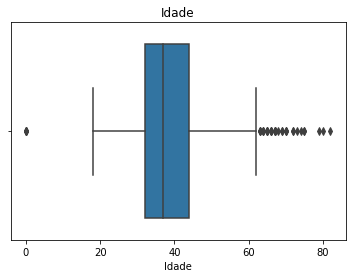

In [19]:
#substituindo pela mediana
mediana = sts.median(df3['Idade']) 
df3.loc[(df3['Idade'] < 0 ) | (df3['Idade'] > 120), 'Idade'] = mediana
sns.boxplot(df3["Idade"]).set_title("Idade")
df3["Idade"].describe()

In [83]:
# Saldo
df3["Saldo"].describe() # nesse momento nada estranho

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

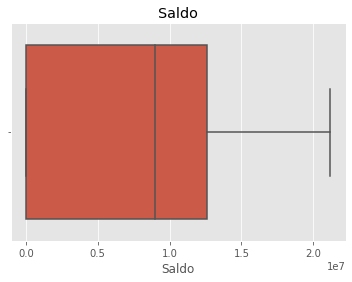

In [84]:
sns.boxplot(df3["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

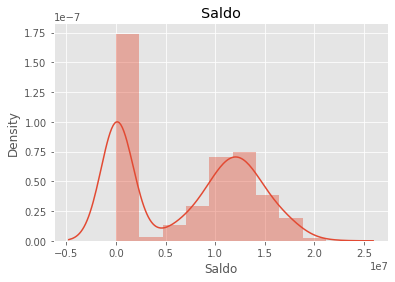

In [85]:
sns.distplot(df3["Saldo"]).set_title("Saldo")
# Podemos observar que há muitas pessoas com saldo zero.

In [28]:
# Salario
df3["Salario"].describe()

count    9.980000e+02
mean     3.505879e+07
std      5.289889e+08
min      9.677000e+03
25%      2.849010e+06
50%      8.637196e+06
75%      1.401381e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

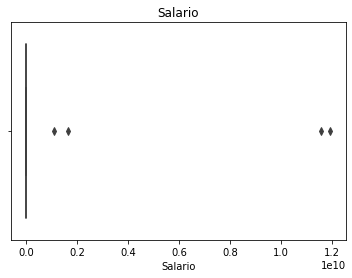

In [27]:
sns.boxplot(df3["Salario"]).set_title("Salario")
# aparecem outliers que precisam ser analisados mais detalhadamente

Text(0.5, 1.0, 'Salario')

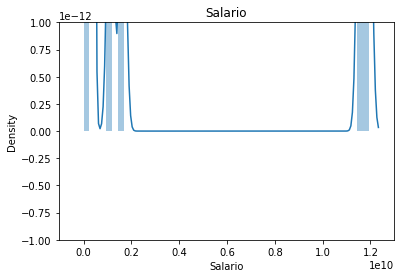

In [29]:
sns.distplot(df3["Salario"]).set_title("Salario")
# O histograma confirma que há salários com valores muito distintos da maioria

In [34]:
# Ajeitando a coluna Salarios
#print(df3.isnull().sum()) # mostra colunas que contem Null ou NAN, ou vazios
# Outliers, iremos considerar 2 desvios padrões
dp = sts.stdev(df3["Salario"])
dp
df3.loc[df3["Salario"]>=2*dp]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


Text(0.5, 1.0, 'Salario')

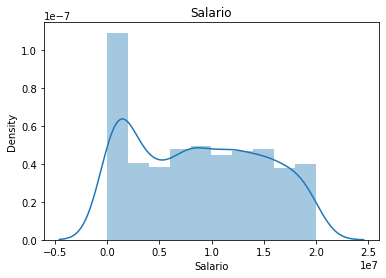

In [37]:
## substituição pela mediana dos salarios maiores ou menores que 2 dp
mediana = sts.median(df3["Salario"])
df3.loc[df3["Salario"]>=2*dp, "Salario"] = mediana 
df3.loc[df3["Salario"]>=2*dp]
sns.distplot(df3["Salario"]).set_title("Salario")